**Introduction**

**My goal**: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.
The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10.

### Project Details


Tasks:
 - Data wrangling, which consists of: Gathering data, Assessing data and Cleaning data
 - Storing, analyzing, and visualizing your wrangled data
 - Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [275]:

#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import tweepy 
import json
import re
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [276]:
df = pd.read_csv("twitter-archive-enhanced.csv")


In [277]:
import os
import requests


folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response



<Response [200]>

In [278]:
with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
image_df= pd.read_csv('./image_predictions/image-predictions.tsv', sep='\t')
image_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Note:
I have not received authorization from twitter therefore I used the file from the internet.
I have added the code below and saved it in a .py file in the workspace folder.


In [279]:
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
df_api = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

In [280]:
tweet_df = df_api[['id', 'retweet_count', 'favorite_count']]
tweet_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [281]:
tweet_df.to_csv("tweet_json.csv")

In [282]:
df_clean = df.copy()
image_clean = image_df.copy()
tweet_clean = tweet_df.copy()

### Assessing Data
#### Project Requirment:
 - After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points below) must be assessed.
 - Key Points
#### Key points to keep in mind when data wrangling for this project:
 - You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
 - Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
 - Cleaning includes merging individual pieces of data according to the rules of tidy data.
 - The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
 - You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [283]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [284]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [285]:
df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [286]:
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [287]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [288]:
sum(image_clean.jpg_url.duplicated())

66

In [289]:
image_clean.p1.value_counts()


golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [290]:
image_clean.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
malinois                           20
chow                               20
toy_terrier                        20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [291]:
image_clean.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [292]:
image_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [293]:
tweet_clean

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [294]:
tweet_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [295]:
tweet_clean.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Quality Issues
It includes issues like completeness, validity, accuracy and consistency.

**df_clean**
1. remove duplicated tweets.
2. change tweet_id datatype to string.
3. remove columns not needed for analysis.
4. change timestamp datatype to date time and make separate columns for each.

**image_clean**
5. p1,p2 and p3 have inconsisitent capital words
6. drop duplicate jpg_url.
7. p1,p2 and p3 have unnessary underscore instead of space.

**tweet_clean**
8. rename id to tweet_id so can merge later.


## Tidiness
A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table


### Cleaning Data

Quality 1. remove duplicated tweets

In [296]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [297]:
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()== True].index, inplace= True)
df_clean.shape[0]

2175

In [298]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [299]:
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis= 1 , inplace= True)

In [300]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

Quality 3. remove columns not needed for analysis.

In [301]:
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace= True)

In [302]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

Quality 4. change timestamp datatype to date time and make separate columns for each.

In [303]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

In [304]:
df_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00


In [305]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 254.9+ KB


Quality 5. p1,p2 and p3 have inconsisitent capital words.

In [306]:
image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

In [307]:
image_clean.head(5)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


Quality 6.drop duplicate jpg_url.

In [308]:
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [309]:
sum(image_clean['jpg_url'].duplicated())

0

Quality 7. p1,p2 and p3 have unnessary underscore instead of space 

In [310]:
image_clean['p1'] = image_clean['p1'].str.replace('_', ' ')
image_clean['p2'] = image_clean['p2'].str.replace('_', ' ')
image_clean['p3'] = image_clean['p3'].str.replace('_', ' ')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [311]:
image_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


Quality 8. rename id to tweet_id so can merge later.

In [312]:
tweet_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

In [313]:
tweet_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

Quality 2. change tweet_id datatype to string.

In [314]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype('str')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [315]:
print(type(df_clean['tweet_id'].iloc[0]))
print(type(image_clean['tweet_id'].iloc[0]))
print(type(tweet_clean['tweet_id'].iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>


Tidiness 1. combining dog stages to one column.

In [316]:
df_clean['dog_stages'] = df_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
df_clean['dog_stages'].replace("NoneNoneNoneNone","None ", inplace=True) # if all none then filled with none
df_clean['dog_stages'].replace("doggoNoneNoneNone","doggo", inplace=True)# if doggo then filled with doggo
df_clean['dog_stages'].replace("NoneflooferNoneNone","floofer", inplace=True)# if floofer then filled with floofer
df_clean['dog_stages'].replace("NoneNonepupperNone","pupper", inplace=True)# if pupper then filled pupper
df_clean['dog_stages'].replace("NoneNoneNonepuppo","puppo", inplace=True)# if puppo then filled puppo

In [317]:
df_clean.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace= True)

Tidiness 2.  change Date and time column from object to date time format.

In [318]:
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['time'] = pd.to_datetime(df_clean['time'])

In [319]:
print(type(df_clean['date'].iloc[0]))
print(type(df_clean['time'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Tidiness 3. Merge df_clean, image_clean and twitter_clean dataframes.¶

In [320]:
df_master = pd.merge(df_clean, image_clean, on ='tweet_id', how= 'inner' )
df_master = pd.merge(df_master, tweet_clean, on = 'tweet_id', how = 'inner' )

In [321]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 24 columns):
tweet_id              1928 non-null object
timestamp             1928 non-null datetime64[ns]
source                1928 non-null object
text                  1928 non-null object
expanded_urls         1928 non-null object
rating_numerator      1928 non-null int64
rating_denominator    1928 non-null int64
name                  1928 non-null object
date                  1928 non-null datetime64[ns]
time                  1928 non-null datetime64[ns]
dog_stages            1928 non-null object
jpg_url               1928 non-null object
img_num               1928 non-null int64
p1                    1928 non-null object
p1_conf               1928 non-null float64
p1_dog                1928 non-null bool
p2                    1928 non-null object
p2_conf               1928 non-null float64
p2_dog                1928 non-null bool
p3                    1928 non-null object
p3_conf       

## Saving master data to CSV file

In [322]:
df_master.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')

# Analyzing

In [323]:
df_master.describe()


,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1928.000000,1928.000000,1928.000000,1928.000000,1.928000e+03,1.928000e+03,1928.000000,1928.000000
mean,12.293568,10.550311,1.201763,0.593835,1.338761e-01,6.008588e-02,2514.632261,8296.298237
std,42.201839,7.444349,0.558240,0.273084,1.006528e-01,5.083543e-02,4187.214895,11371.277140
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,10.000000,1.000000,0.360137,5.378615e-02,1.605498e-02,611.750000,1873.750000
50%,11.000000,10.000000,1.000000,0.587635,1.163795e-01,4.952715e-02,1299.000000,3904.000000
75%,12.000000,10.000000,1.000000,0.848562,1.943738e-01,9.130702e-02,2911.250000,10280.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [324]:
df_master.p1.value_counts()
df_master.p2.value_counts()
df_master.p3.value_counts()

labrador retriever                73
chihuahua                         56
golden retriever                  44
eskimo dog                        34
kelpie                            31
chow                              30
toy poodle                        29
beagle                            29
kuvasz                            28
pekinese                          28
staffordshire bullterrier         28
cocker spaniel                    27
pembroke                          25
pomeranian                        25
great pyrenees                    25
malamute                          24
french bulldog                    24
cardigan                          23
american staffordshire terrier    22
chesapeake bay retriever          21
bull mastiff                      19
basenji                           19
siberian husky                    19
pug                               19
boston bull                       17
shetland sheepdog                 17
lakeland terrier                  16
b

# Visualization

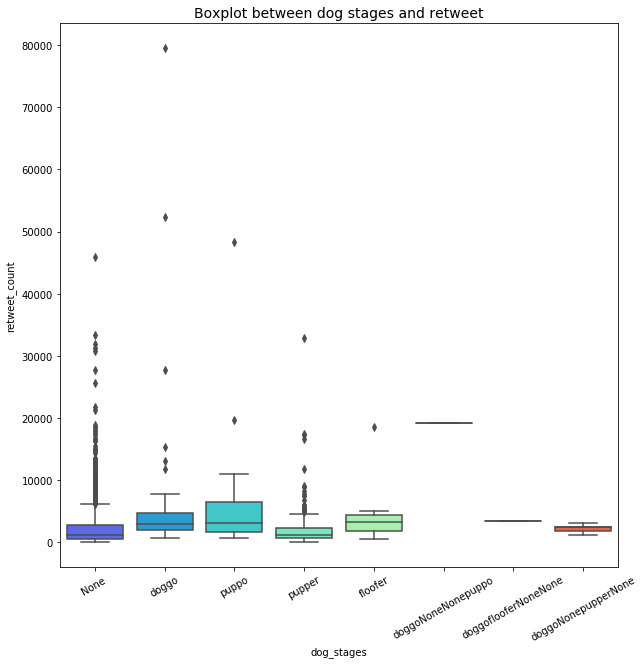

In [325]:
plt.figure(figsize=(10,10))
sns.boxplot(x='dog_stages',y='retweet_count',data= df_master,palette='rainbow')
plt.title('Boxplot between dog stages and retweet', fontsize=14);
plt.xticks(rotation=30)
plt.show()

Most dogs are in Puppo category but highest retweeted about doggo stage.

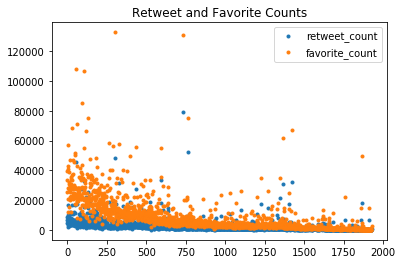

In [326]:
plt.figure(figsize = (10, 10))
df_master[['retweet_count', 'favorite_count']].plot(style = '.')
plt.title('Retweet and Favorite Counts')
plt.show()

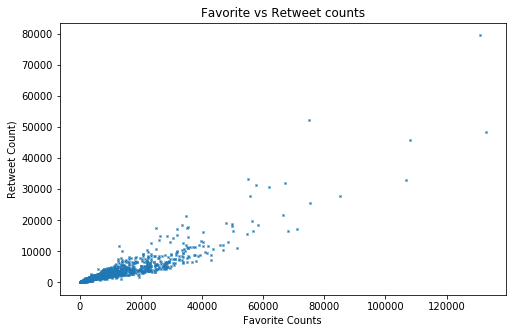

In [327]:
plt.figure(figsize = (8, 5))
plt.plot(df_master.favorite_count, df_master.retweet_count, marker='x', linestyle='', ms=2 )
plt.title('Favorite vs Retweet counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Count)')
plt.savefig('Fav vs Retweet.png')
plt.show()

If a tweet gets liked then it is likely to be tweeted multiple times.

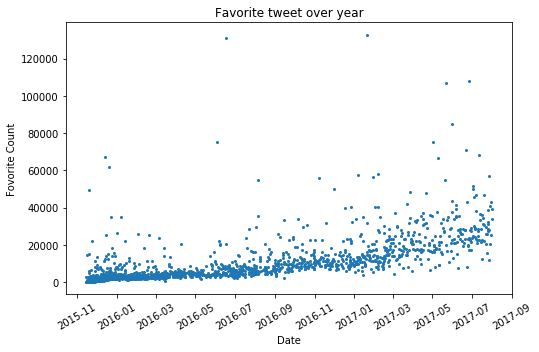

In [328]:
plt.figure(figsize = (8, 5))
plt.plot(df_master.date,df_master.favorite_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Favorite tweet over year')
plt.xlabel('Date')
plt.xticks(rotation = 30)
plt.ylabel('Fovorite Count')
plt.savefig('Fav tweets over year.png')
plt.show()

It has a positive relation but spikes represent that some favorite tweet counts above 100k hits tweet which are least.